In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [5]:
states = pd.read_csv('us_tile_grid.csv')

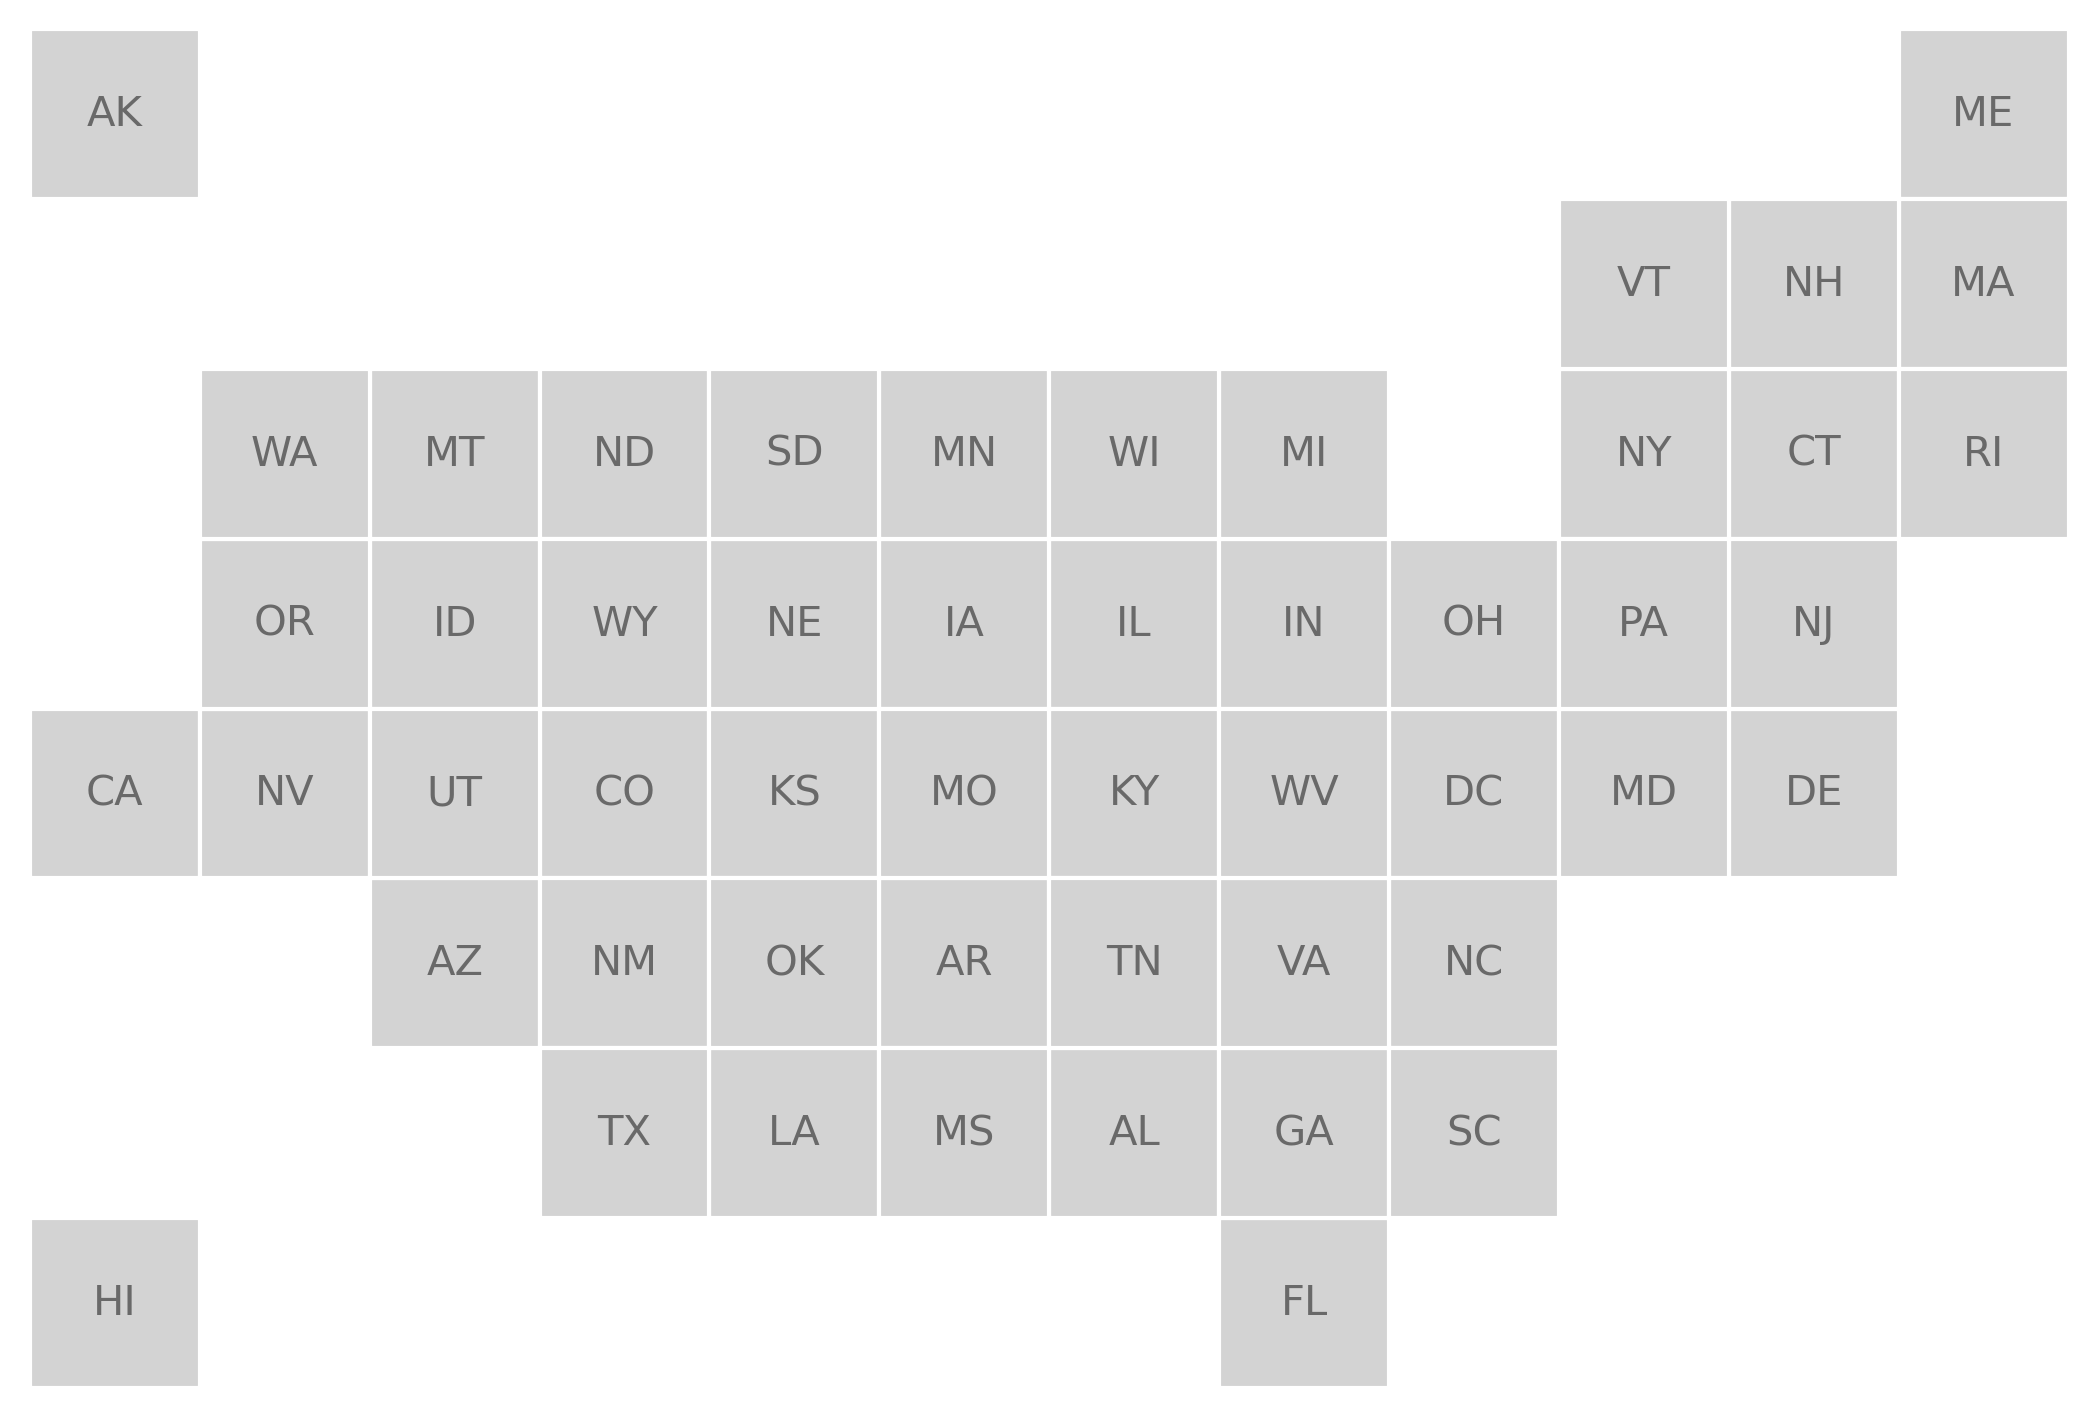

In [6]:
fig, axs = plt.subplots(1, figsize=(12, 6), dpi=300)
plt.xlim(0, 12)
plt.ylim(0, 8)
plt.axis('off')
axs.set_aspect('equal')
for _, state in states.iterrows():
    box = patches.Rectangle((state.column,state.row),1,1,linewidth=1,edgecolor='white',facecolor='lightgrey')
    plt.text(state.column + 0.5, state.row + 0.5, state.code, horizontalalignment='center', verticalalignment='center', color='dimgrey')
    axs.add_patch(box)

plt.show()

In [8]:
election = pd.read_csv('america.csv');
election['winner']=np.where(pd.isna(election['Trump']), 'Clinton', 'Trump')
election = election[['state_code', 'winner']].merge(states, how='inner', left_on='state_code', right_on='code')

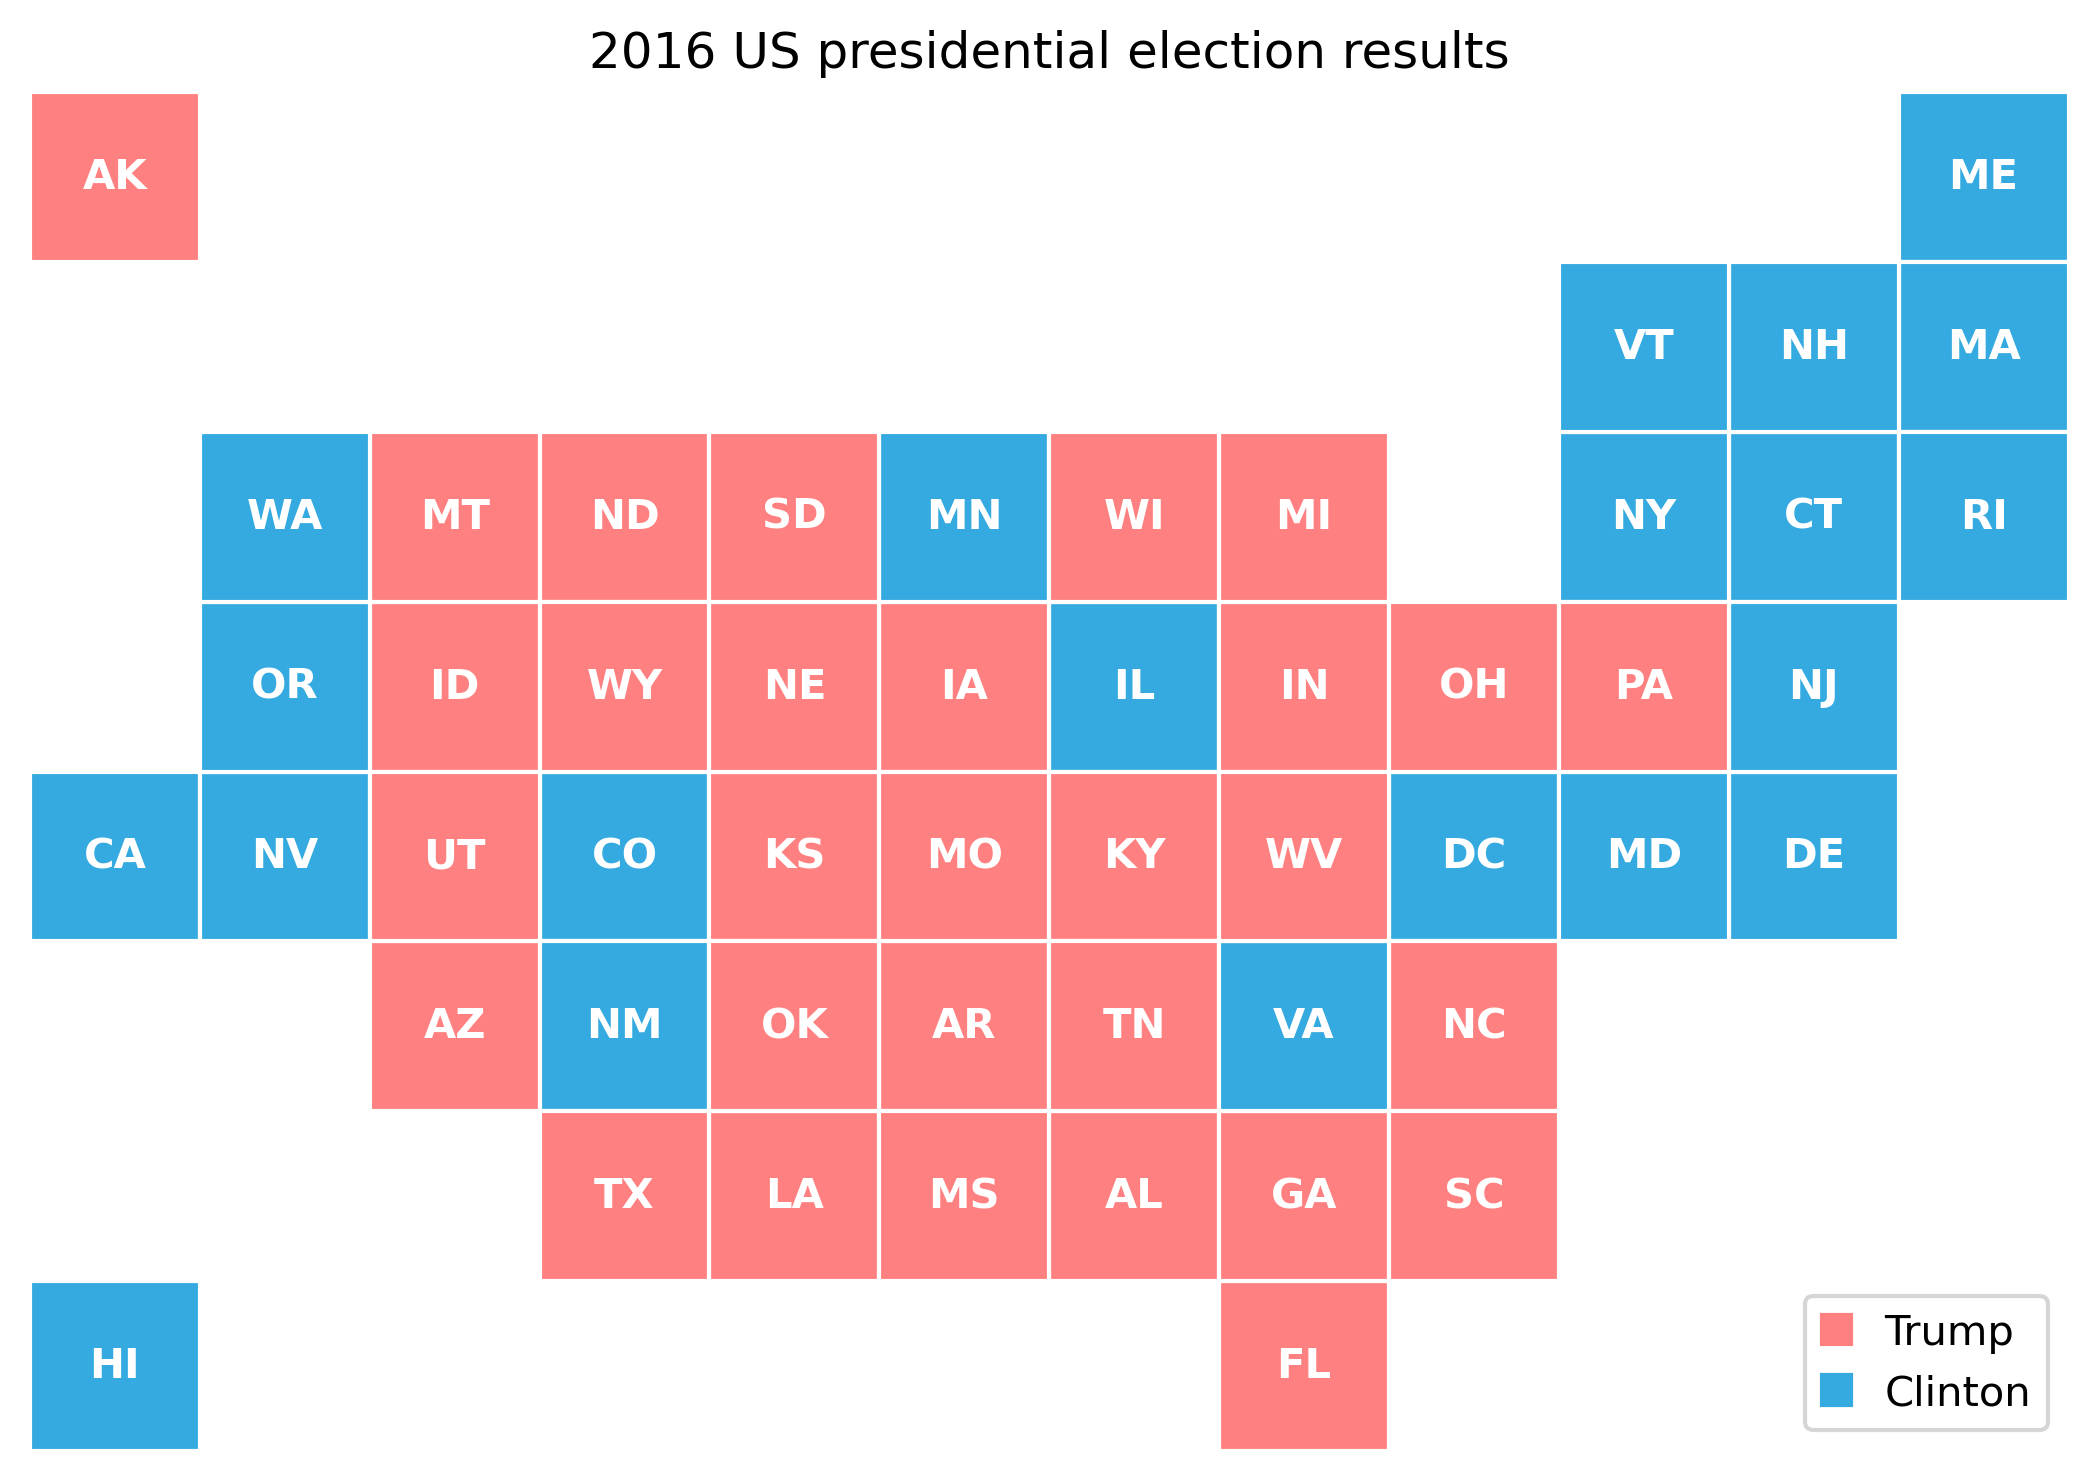

In [9]:
colors = { 'Trump': '#ff8080', 'Clinton': '#34aae0' }
red = patches.Patch(color=colors['Trump'], label='Trump')
blue = patches.Patch(color=colors['Clinton'], label='Clinton')

fig, axs = plt.subplots(1, figsize=(12, 6), dpi=300)
plt.xlim(0, 12)
plt.ylim(0, 8)
plt.axis('off')
axs.set_aspect('equal')
for _, state in election.iterrows():
    box = patches.Rectangle((state.column,state.row),1,1,linewidth=1,edgecolor='white',facecolor=colors[state.winner])
    plt.text(state.column + 0.5, state.row + 0.5, state.code, horizontalalignment='center', verticalalignment='center', color='white', weight='bold')
    axs.add_patch(box)

plt.title('2016 US presidential election results')
plt.legend(handles=[red, blue], handlelength=0.7)
plt.show()